### Goal:

For our case study, we want to utalize supervised machine learning approaches to predict the number of covid cases in several selected countires. What we need is a strong model that predicts the spread of the virus across diffrent countries.

### Plan of actions

1. Analysing covid present in China, Italy, United States and Autralia
2. Analysing covid present on a international level
3. Forecasting the number of covid cases using supervised machine learning models (Linear Regression, Polynomial Regression and Multiple Linear Regression)

In [19]:
# import required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("files/Case_PRB.csv",parse_dates=True)
df = df.fillna(0)

C:\Users\nguye\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


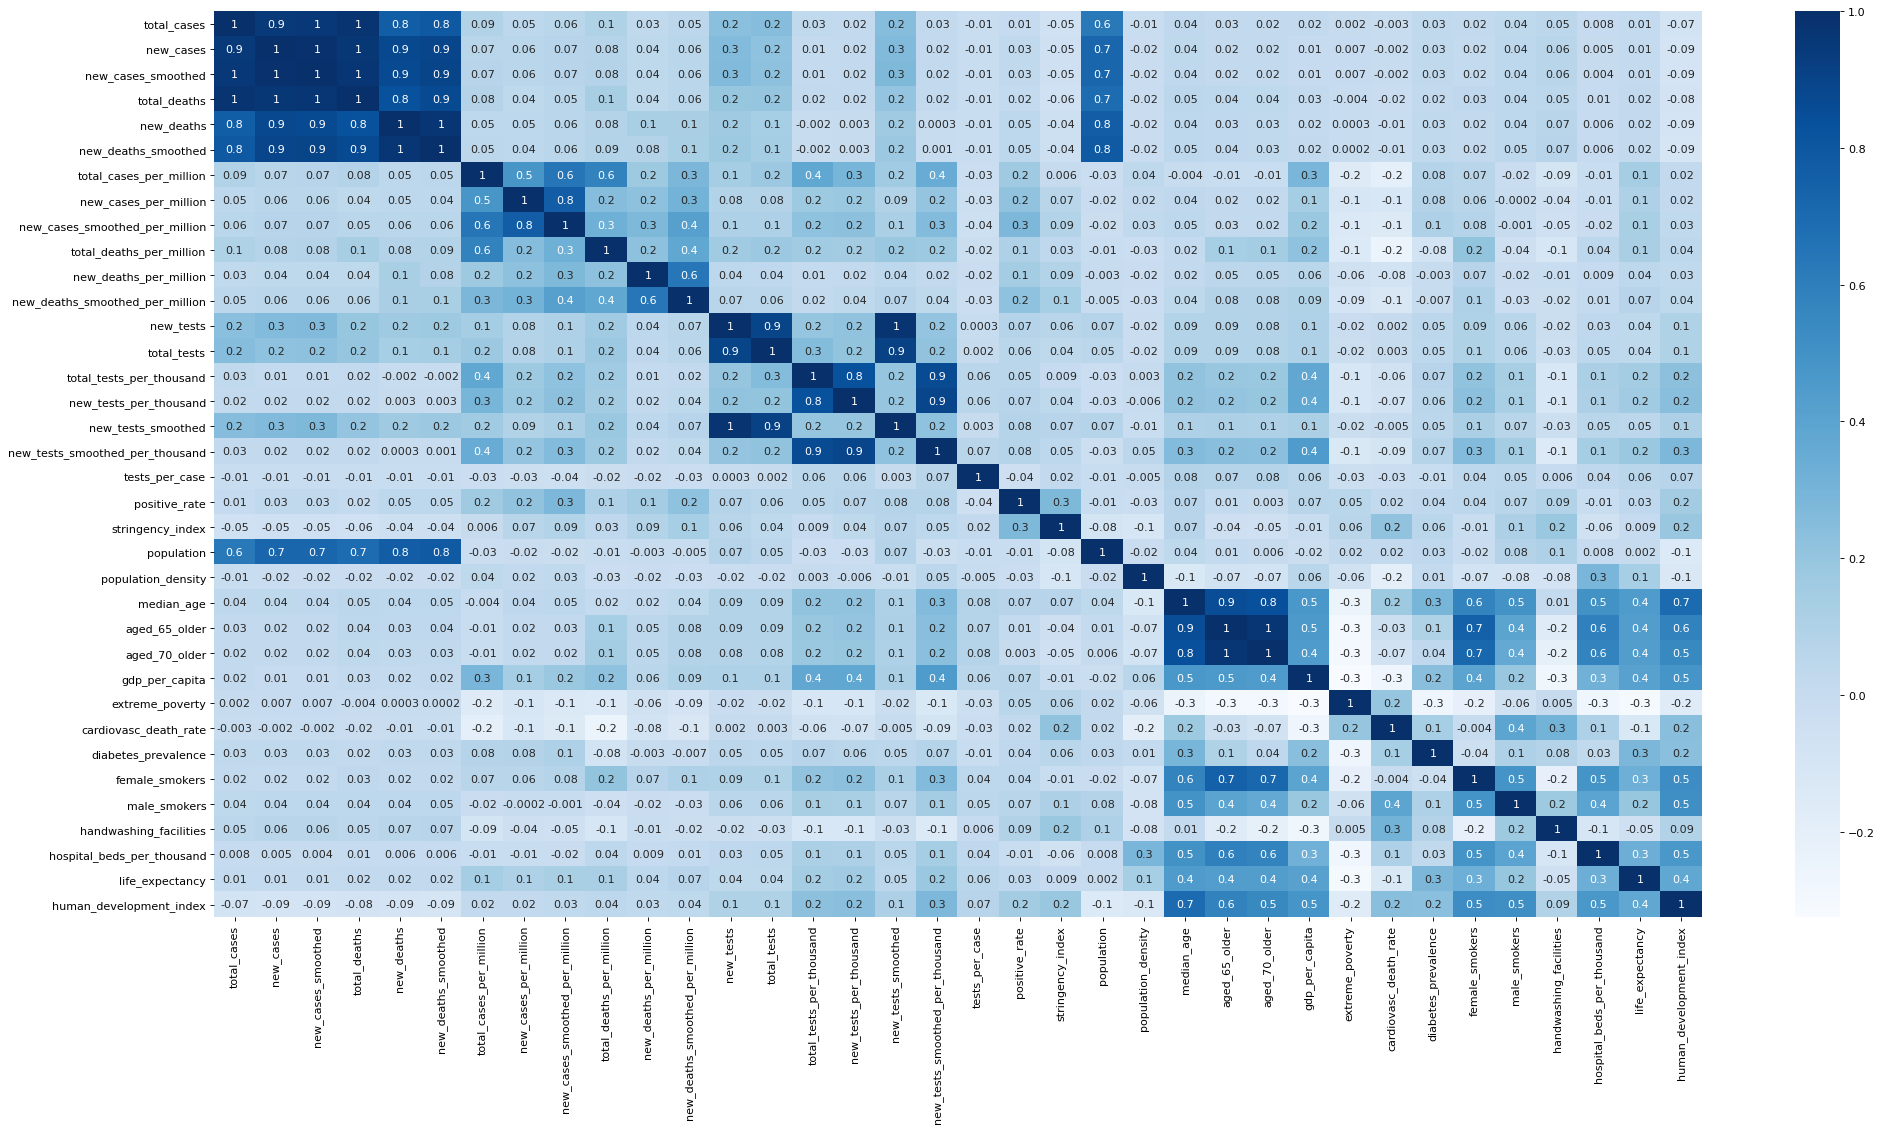

In [45]:
plt.figure(figsize=(30, 15), dpi=80)

# Remove useless data that cannot be used
cleaned_df = df[['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]

# Shows the heatmap correlation, annot shows the data in each cell,
# cmap blues is the color theme, fmt the amount of numbers in the cell
sns.heatmap(cleaned_df.corr(), annot=True, cmap="Blues", fmt='.001g')
plt.show()

Text(0, 0.5, 'total cases')

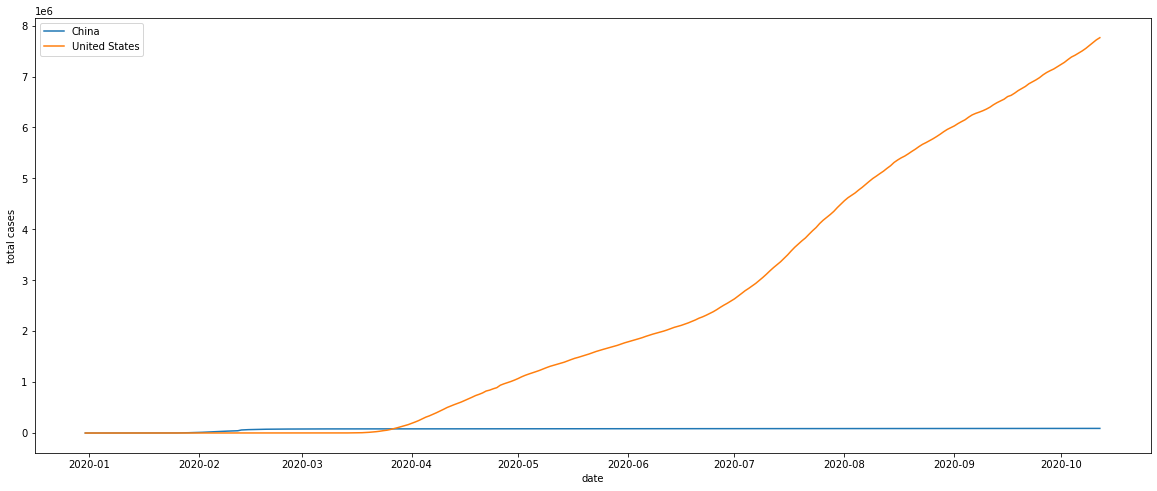

In [79]:


df_australia = df[(df['location'] == "Australia")]
df_china = df[(df['location'] == "China")]
df_italy = df[(df['location'] == "Italy")]
df_usa = df[(df['location'] == "United States")]

plt.rcParams["figure.figsize"] = (20, 8)
# plt.plot(pd.to_datetime(df_australia['date']), df_australia['total_cases'], label="australia")
plt.plot(pd.to_datetime(df_china['date']), df_china['total_cases'], label="China")
# plt.plot(pd.to_datetime(df_italy['date']), df_italy['total_cases'], label="Italy")
plt.plot(pd.to_datetime(df_usa['date']), df_usa['total_cases'], label="United States")

plt.legend()
plt.xlabel("date")
plt.ylabel("total cases")

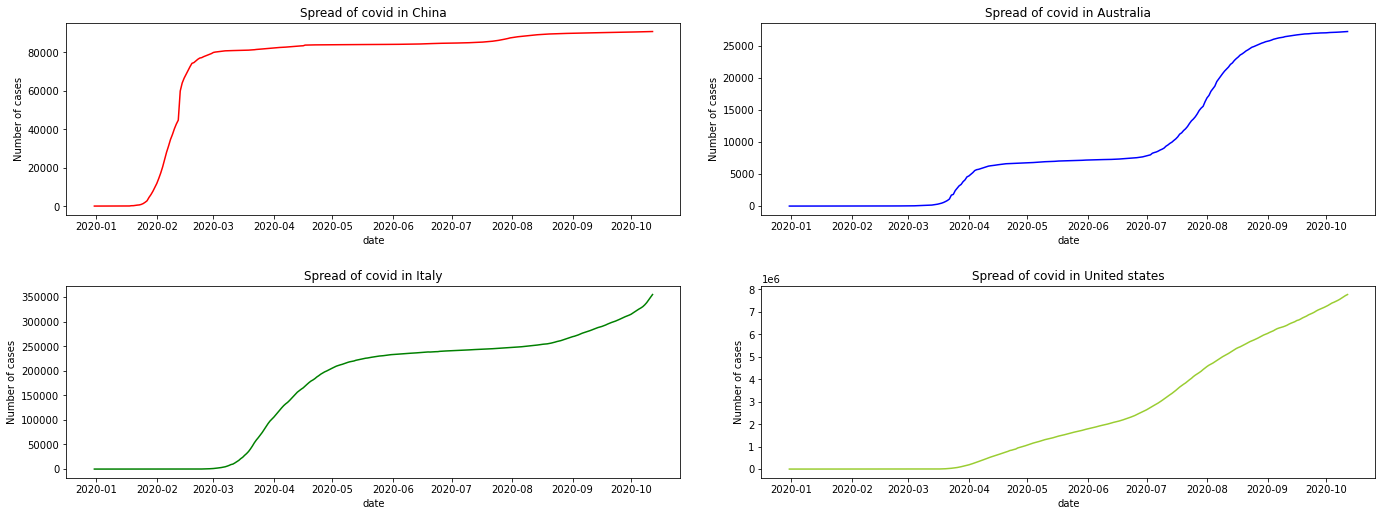

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax[0, 0].plot(pd.to_datetime(df_china['date']), df_china['total_cases'], label="China", color="red")
ax[0, 0].set_title("Spread of covid in China")
ax[0, 0].set_xlabel("date")
ax[0, 0].set_ylabel("Number of cases")

ax[0, 1].plot(pd.to_datetime(df_australia['date']), df_australia['total_cases'], label="australia", color='blue')
ax[0, 1].set_title("Spread of covid in Australia")
ax[0, 1].set_xlabel("date")
ax[0, 1].set_ylabel("Number of cases")

ax[1, 0].plot(pd.to_datetime(df_italy['date']), df_italy['total_cases'], label="Italy", color="green")
ax[1, 0].set_title("Spread of covid in Italy")
ax[1, 0].set_xlabel("date")
ax[1, 0].set_ylabel("Number of cases")

ax[1, 1].plot(pd.to_datetime(df_usa['date']), df_usa['total_cases'], label="United States", color="yellowgreen")
ax[1, 1].set_title("Spread of covid in United states")
ax[1, 1].set_xlabel("date")
ax[1, 1].set_ylabel("Number of cases")
plt.show()

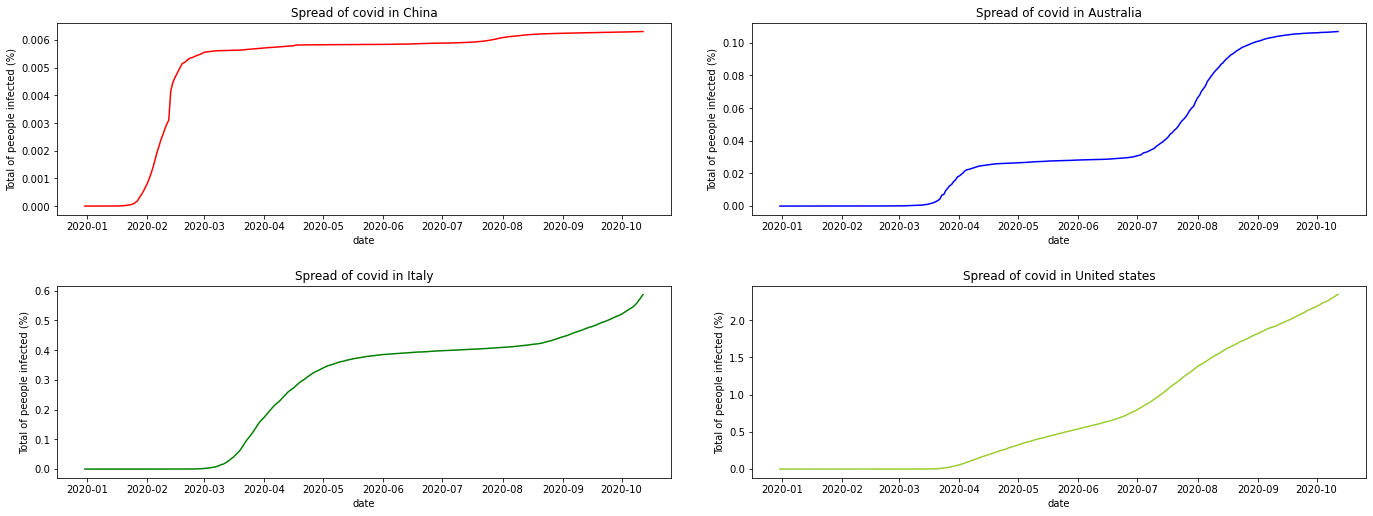

In [75]:
total_population_china = df_china.iloc[0]['population']
total_population_australia = df_australia.iloc[0]['population']
total_population_italy = df_italy.iloc[0]['population']
total_population_usa = df_usa.iloc[0]['population']

fig, ax = plt.subplots(2, 2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax[0, 0].plot(pd.to_datetime(df_australia['date']), (100/total_population_china * df_china['total_cases']), label="australia", color='red')
ax[0, 0].set_title("Spread of covid in China")
ax[0, 0].set_xlabel("date")
ax[0, 0].set_ylabel("Total of peeople infected (%)")

ax[0, 1].plot(pd.to_datetime(df_china['date']), (100/total_population_australia * df_australia['total_cases']), label="China", color="blue")
ax[0, 1].set_title("Spread of covid in Australia")
ax[0, 1].set_xlabel("date")
ax[0, 1].set_ylabel("Total of peeople infected (%)")

ax[1, 0].plot(pd.to_datetime(df_italy['date']), (100/total_population_italy * df_italy['total_cases']), label="Italy", color="green")
ax[1, 0].set_title("Spread of covid in Italy")
ax[1, 0].set_xlabel("date")
ax[1, 0].set_ylabel("Total of peeople infected (%)")

ax[1, 1].plot(pd.to_datetime(df_usa['date']), (100/total_population_usa * df_usa['total_cases']), label="United States", color="yellowgreen")
ax[1, 1].set_title("Spread of covid in United states")
ax[1, 1].set_xlabel("date")
ax[1, 1].set_ylabel("Total of peeople infected (%)")
plt.show()
